In [112]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

import astropy.io.fits as fits

import astropy.units as u
import astropy.constants as const

import glob

import os

from photutils.aperture import EllipticalAperture
from photutils.aperture import EllipticalAnnulus
from photutils import aperture_photometry

from matplotlib.colors import LogNorm

# Starting with NGC 4214:

In [2]:
# filepath for NGC 4214 observations:

filepath = glob.glob('./fits/ARCSAT/5-19/NGC*.fits')

In [3]:
# getting copies of data and headers for M49; prints filenames:

data_array = []
header_array = []

for file in filepath:

    hdu = fits.open(file)
    data_array.append(hdu[0].data.copy())
    header_array.append(hdu[0].header.copy())
    print(os.path.basename(file))

hdu.close()

NGC4214_halpha_20180520_054547.fits
NGC4214_sdss_g_20180520_045658.fits
NGC4214_sdss_g_20180520_050153.fits
NGC4214_sdss_i_20180520_052023.fits
NGC4214_sdss_r_20180520_051051.fits
NGC4214_sdss_z_20180520_053032.fits


In [4]:
plt.style.use('default')

In [6]:
from astropy.visualization import make_lupton_rgb

# Okay now to actually import the biases and flats:

In [9]:
# Night 2 Bias Filepath:

filepath2 = glob.glob('./fits/ARCSAT/5-19/Bias*.fits')

In [10]:
# Retrieves night 2 bias stuff; prints filenames & returns avg. bias count.

biasdata_array = []
biasheader_array = []
bias_avgs = []
superbias = []

for file in filepath2:

    hdu1 = fits.open(file)
    biasdata_array.append(hdu1[0].data.copy())
    biasheader_array.append(hdu1[0].header.copy())
    print(os.path.basename(file))
    bdata = fits.getdata(file)
    bias_avgs.append(np.mean(bdata))

super_bias = np.mean(bias_avgs)

hdu1.close()
print(super_bias)

Bias_BIN1_20180520_082435.fits
Bias_BIN1_20180520_082510.fits
Bias_BIN1_20180520_082533.fits
Bias_BIN1_20180520_082555.fits
Bias_BIN1_20180520_082622.fits
1131.0744609951973


In [11]:
# Filepath for night 2 dome flats.

filepath3 = glob.glob('./fits/ARCSAT/5-19/domeflat*.fits')

In [12]:
# Getting dome flat stuff:

domeflatdata_array = []
domeflatheader_array = []

for file in filepath3:

    hdu2 = fits.open(file)
    domeflatdata_array.append(hdu2[0].data.copy())
    domeflatheader_array.append(hdu2[0].header.copy())
    print(os.path.basename(file))

hdu2.close()

domeflat_halpha_001.fits
domeflat_sdss_g_001-2.fits
domeflat_sdss_g_002-2.fits
domeflat_sdss_g_003-2.fits
domeflat_sdss_i_001.fits
domeflat_sdss_i_002.fits
domeflat_sdss_i_003.fits
domeflat_sdss_r_001.fits
domeflat_sdss_r_002.fits
domeflat_sdss_r_003.fits
domeflat_sdss_z_001.fits


In [13]:
# sdss_i avg. flat count:

iflat_avg = np.mean(domeflatdata_array[4:7])
print(iflat_avg)

19478.75809923808


# Now for actual data reduction (of NGC 4214):

In [14]:
# subtract biases - from everything,
# divide flats

In [15]:
from sklearn.preprocessing import normalize

In [16]:
# making average i band flat:

i_avg_flats = (domeflatdata_array[4] + domeflatdata_array[5] + domeflatdata_array[6])/3

In [17]:
i_avg_flats_minusbias = i_avg_flats - super_bias

In [18]:
# normalizing i band flat:

n2_domeflatnorm_i = normalize(i_avg_flats_minusbias)

In [19]:
reduced_i_NGC4214 = (data_array[3] - super_bias)/(n2_domeflatnorm_i)

In [20]:
r_avg_flats = (domeflatdata_array[7] + domeflatdata_array[8] + domeflatdata_array[9])/3

In [21]:
rflat_minusbias = r_avg_flats - super_bias

In [22]:
n2_domeflatnorm_r = normalize(rflat_minusbias)

In [23]:
reduced_r_NGC4214 = (data_array[4] - super_bias)/(n2_domeflatnorm_r)

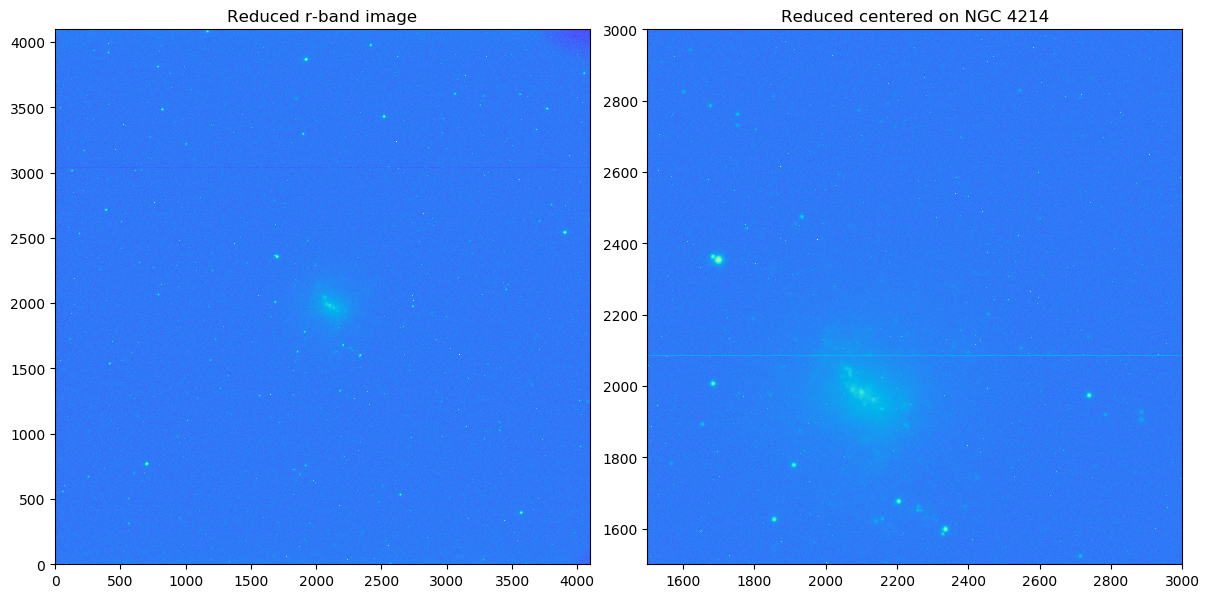

In [24]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[1].axis((1500,3000,1500,3000))

ax[0].imshow(reduced_r_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')
ax[1].imshow(reduced_r_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')

ax[0].set_title('Reduced r-band image')
ax[1].set_title('Reduced centered on NGC 4214');

In [25]:
# g band

g_avg_flats_minusbias = ((domeflatdata_array[1] + domeflatdata_array[2] + domeflatdata_array[3])/3) - super_bias

n2_domeflatnorm_g = normalize(g_avg_flats_minusbias)

reduced_g_NGC4214 = (data_array[2] - super_bias)/(n2_domeflatnorm_g)

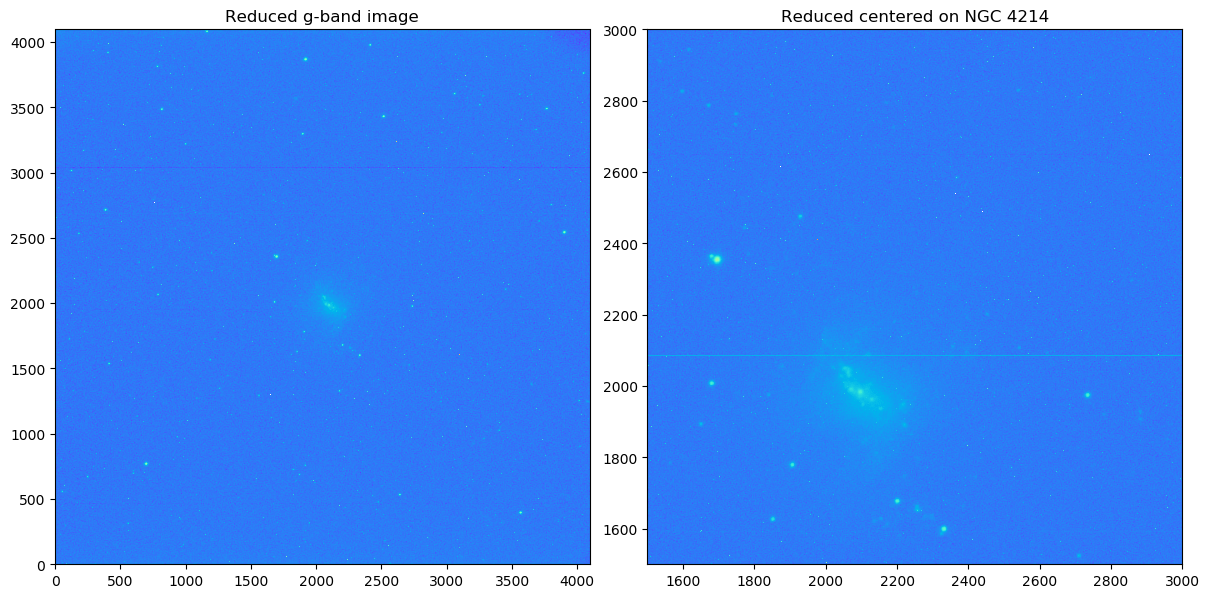

In [26]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[1].axis((1500,3000,1500,3000))

ax[0].imshow(reduced_g_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')
ax[1].imshow(reduced_g_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')

ax[0].set_title('Reduced g-band image')
ax[1].set_title('Reduced centered on NGC 4214');

In [27]:
# z band

z_avg_flats_minusbias = domeflatdata_array[10] - super_bias

n2_domeflatnorm_z = normalize(z_avg_flats_minusbias)

reduced_z_NGC4214 = (data_array[5] - super_bias)/(n2_domeflatnorm_z)

In [28]:
# H alpha:

halpha_avg_flats_minusbias = domeflatdata_array[0] - super_bias

n2_domeflatnorm_halpha = normalize(halpha_avg_flats_minusbias)

reduced_halpha_NGC4214 = (data_array[0] - super_bias)/(n2_domeflatnorm_halpha)

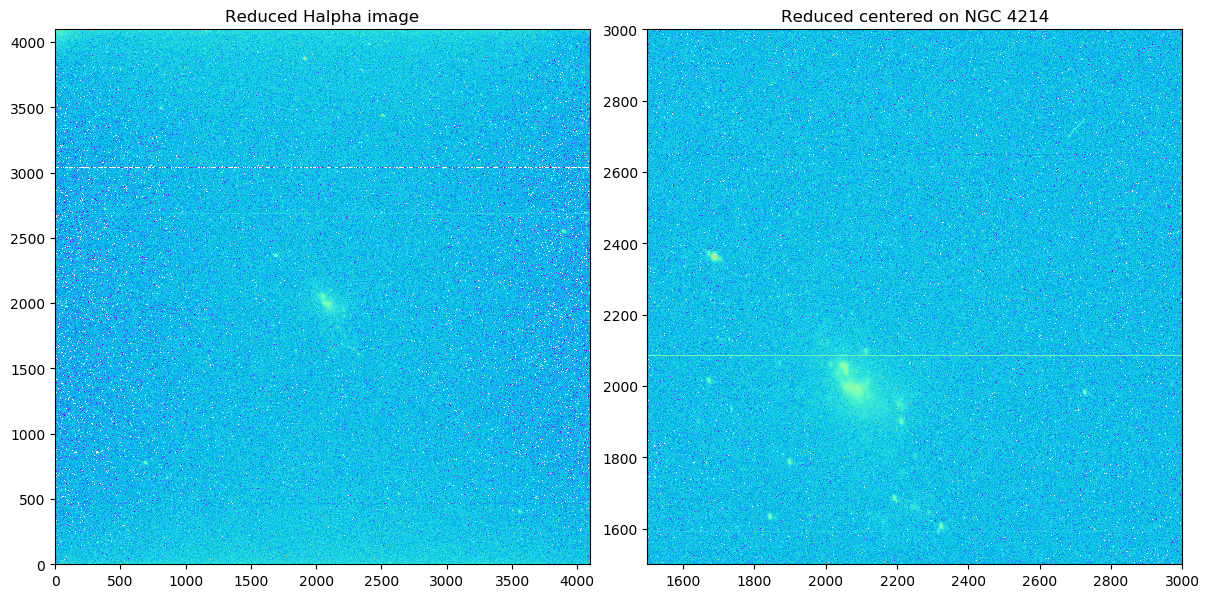

In [29]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[1].axis((1500,3000,1500,3000))

ax[0].imshow(reduced_halpha_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')
ax[1].imshow(reduced_halpha_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')

ax[0].set_title('Reduced Halpha image')
ax[1].set_title('Reduced centered on NGC 4214');

# Now for sky-subtraction:

In [30]:
# g band

In [31]:
coord = [2097.375, 1983.875]

In [32]:
ApertureScience = EllipticalAperture(coord, a=265, b=220, theta=(np.pi/2)+.2)

In [33]:
ap_pho = aperture_photometry(reduced_g_NGC4214, ApertureScience, method='exact')
ap_pho

<QTable length=1>
  id  xcenter  ycenter     aperture_sum   
        pix      pix                      
int64 float64  float64       float64      
----- -------- -------- ------------------
    1 2097.375 1983.875 1299121406.2478087

In [34]:
count = []

count_a = ap_pho['aperture_sum']
count_per_area = (count_a / (ApertureScience.area())) # counts / pixel squared
count.append(count_per_area)
print(count)

[<Column name='aperture_sum' dtype='float64' length=1>
7093.022074814169]


In [35]:
# That could be right.

In [36]:
coord2 = [540.906, 3200.755]

In [37]:
ApertureCircle = EllipticalAperture(coord2, a=5, b=5, theta=0)

In [38]:
circle_pho = aperture_photometry(reduced_g_NGC4214, ApertureCircle, method='exact')

In [39]:
gsky_count = []

count_sky = circle_pho['aperture_sum']
gsky_count_per_area = (count_sky / (ApertureCircle.area())) # counts / pixel squared
gsky_count.append(gsky_count_per_area)
print(gsky_count)

[<Column name='aperture_sum' dtype='float64' length=1>
3924.7302558358965]


In [40]:
skyless_g = reduced_g_NGC4214 - gsky_count

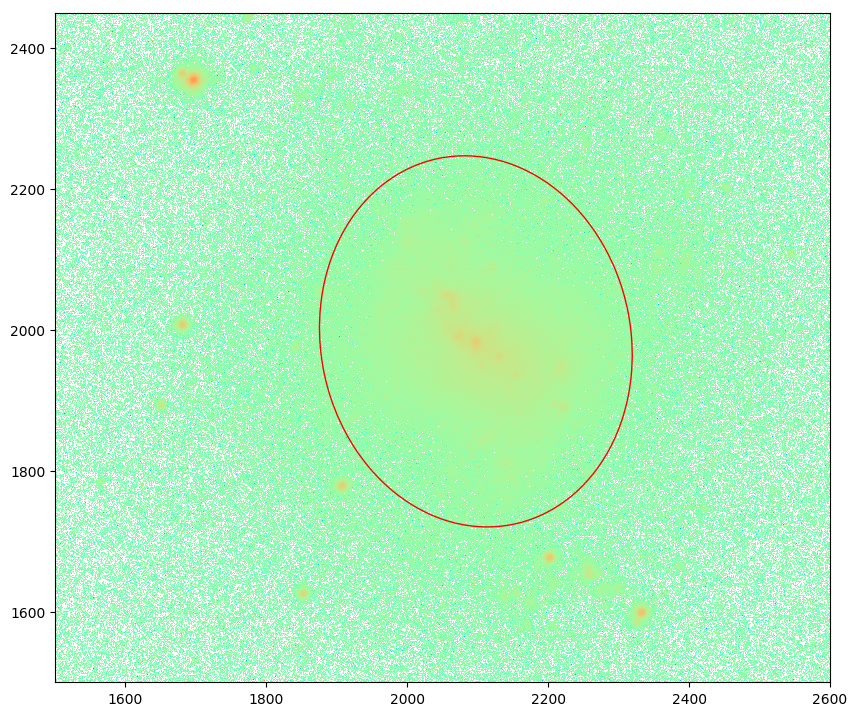

In [41]:
fig,ax = plt.subplots(1,1)                 
fig.set_size_inches(10,10)
fig.set_tight_layout

ax.axis((1500,2600,1500,2450))

plt.imshow(skyless_g, norm=LogNorm(), alpha=1.0, cmap='rainbow', origin='lower')
EllipticalAperture.plot(ApertureScience, color="r");

In [42]:
# i band

In [43]:
icircle_pho = aperture_photometry(reduced_i_NGC4214, ApertureCircle, method='exact')

In [44]:
isky_count = []

icount_sky = icircle_pho['aperture_sum']
isky_count_per_area = (icount_sky / (ApertureCircle.area())) # counts / pixel squared
isky_count.append(isky_count_per_area)
print(isky_count)

[<Column name='aperture_sum' dtype='float64' length=1>
6666.128234370554]


In [45]:
# Metal.

In [46]:
skyless_i = reduced_i_NGC4214 - isky_count

In [47]:
# r band

In [48]:
rcircle_pho = aperture_photometry(reduced_r_NGC4214, ApertureCircle, method='exact')

In [49]:
rsky_count = []

rcount_sky = rcircle_pho['aperture_sum']
rsky_count_per_area = (rcount_sky / (ApertureCircle.area())) # counts / pixel squared
rsky_count.append(rsky_count_per_area)
print(rsky_count)

[<Column name='aperture_sum' dtype='float64' length=1>
6308.5922391040685]


In [50]:
skyless_r = reduced_r_NGC4214 - rsky_count

In [51]:
# zed band

In [52]:
zcircle_pho = aperture_photometry(reduced_z_NGC4214, ApertureCircle, method='exact')

In [53]:
zsky_count = []

zcount_sky = zcircle_pho['aperture_sum']
zsky_count_per_area = (zcount_sky / (ApertureCircle.area())) # counts / pixel squared
zsky_count.append(zsky_count_per_area)
print(zsky_count)

[<Column name='aperture_sum' dtype='float64' length=1>
11909.840695256375]


In [54]:
# ?

In [55]:
skyless_z = reduced_z_NGC4214 - zsky_count

In [56]:
# Ha Ha Ha

In [57]:
hacircle_pho = aperture_photometry(reduced_halpha_NGC4214, ApertureCircle, method='exact')

In [58]:
hasky_count = []

hacount_sky = hacircle_pho['aperture_sum']
hasky_count_per_area = (hacount_sky / (ApertureCircle.area())) # counts / pixel squared
hasky_count.append(hasky_count_per_area)
print(hasky_count)

[<Column name='aperture_sum' dtype='float64' length=1>
1178.812253955097]


In [59]:
skyless_ha = reduced_halpha_NGC4214 - hasky_count

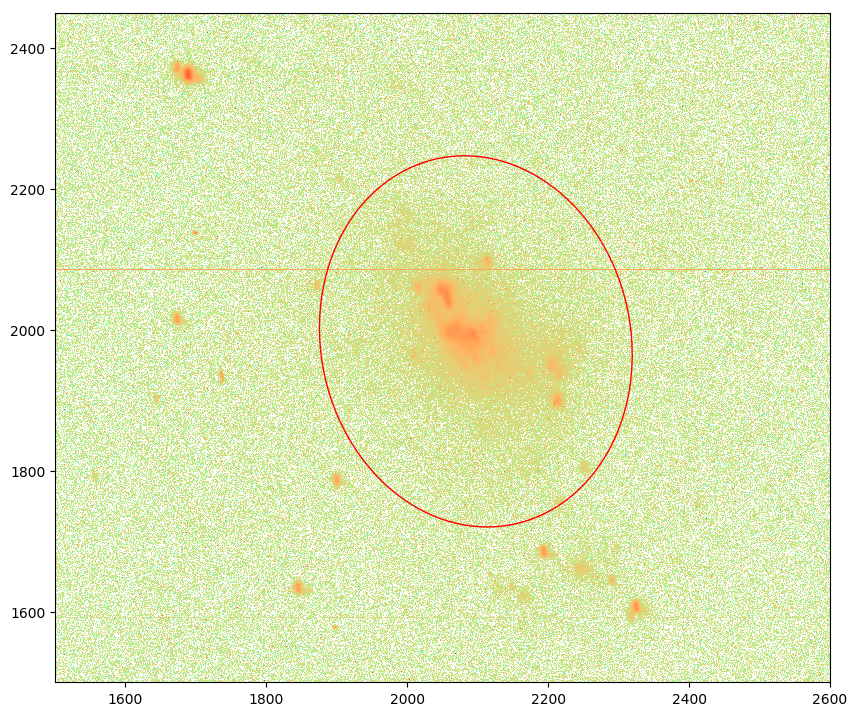

In [60]:
fig,ax = plt.subplots(1,1)                 
fig.set_size_inches(10,10)
fig.set_tight_layout

ax.axis((1500,2600,1500,2450))

plt.imshow(skyless_ha, norm=LogNorm(), alpha=1.0, cmap='rainbow', origin='lower')
EllipticalAperture.plot(ApertureScience, color="r");

In [61]:
# making those apertures

In [62]:
# might want a totally different aperture for Halpha. Would that work for comparison?

gap_pho = aperture_photometry(reduced_g_NGC4214, ApertureScience, method='exact')
rap_pho = aperture_photometry(reduced_r_NGC4214, ApertureScience, method='exact')
iap_pho = aperture_photometry(reduced_i_NGC4214, ApertureScience, method='exact')
zap_pho = aperture_photometry(reduced_z_NGC4214, ApertureScience, method='exact')
hap_pho = aperture_photometry(reduced_halpha_NGC4214, ApertureScience, method='exact')

In [63]:
elliptical_apertures = [hap_pho, gap_pho, rap_pho, iap_pho, zap_pho]

In [64]:
filt_keys = ['haloha', 'g', 'r', 'i', 'z'] # meant for that to say halpha but I think I prefer haloha, as that could
# be either h aloha, so Hawaiian Halpha, or halo ha, the interpretation of which I will leave up to the reader

In [65]:
counts_per_area = []

for aperture in elliptical_apertures:

    count = aperture['aperture_sum']
    per_area = count / ApertureScience.area()
    counts_per_area.append(per_area)
    print(aperture['aperture_sum'])

  aperture_sum  
----------------
371237306.046941
   aperture_sum   
------------------
1299121406.2478087
   aperture_sum  
-----------------
1873443705.840087
   aperture_sum  
-----------------
1681337671.878125
   aperture_sum  
-----------------
2531511654.205827


In [66]:
# A brief interlude for pictures, mostly for the sake of comparison between the blue, broader g-band, and
# redder, narrower, Ha.

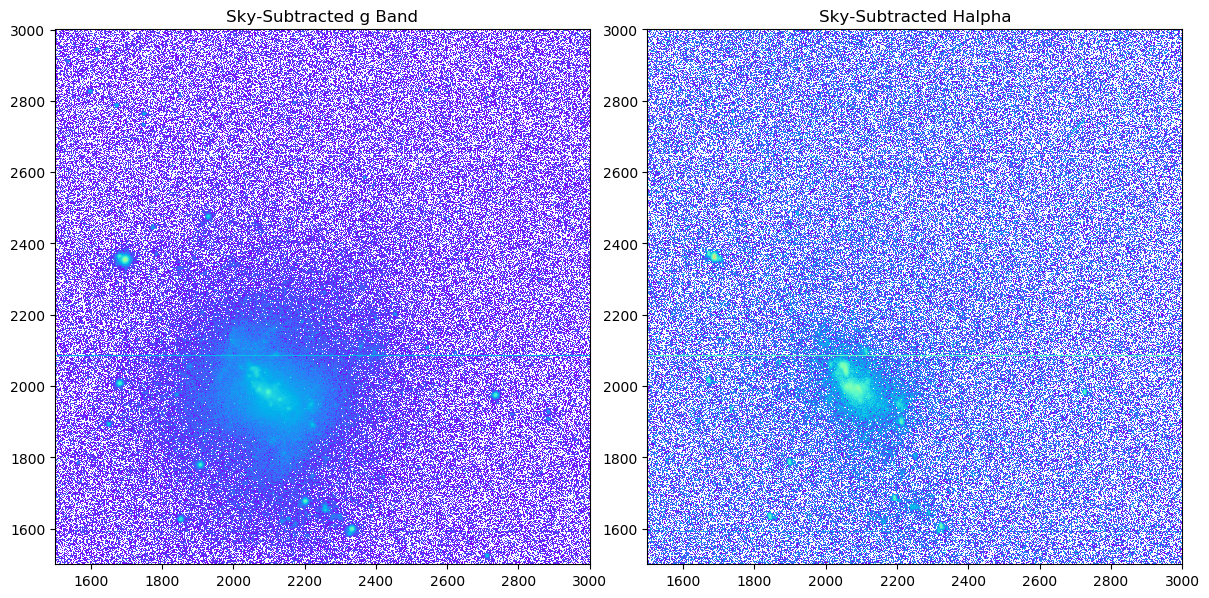

In [67]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].axis((1500,3000,1500,3000))
ax[1].axis((1500,3000,1500,3000))

ax[0].imshow(skyless_g, norm=LogNorm(vmin=200), origin='lower', cmap='rainbow')
ax[1].imshow(skyless_ha, norm=LogNorm(vmin=100), origin='lower', cmap='rainbow')

ax[0].set_title('Sky-Subtracted g Band')
ax[1].set_title('Sky-Subtracted Halpha');

In [68]:
filter_indices = [header_array[0], header_array[2], header_array[4], header_array[3], header_array[-1]]

In [69]:
exp_times = []
z_mags = []

for i in filter_indices:
    exp_times.append(i['EXPTIME'])
    z_mags.append(i['ZMAG'])

In [81]:
keys = [0, 1, 2, 3, 4]
mags = []

for i in keys:
    
    mag = -2.5 * np.log([counts_per_area[i]/exp_times[i]]) + z_mags[i]
    mags.append(mag)
    print(filt_keys[i], mag)

haloha [[15.03989599]]
g [[12.85902802]]
r [[12.52308841]]
i [[12.57349438]]
z [[11.70386315]]


In [71]:
# Absolute Magnitudes:

In [82]:
def abs_mag(apparent_mag, D, extinction):
    '''Returns absolute magnitude given an apparent, (luminosity) distance in Mpc, and extinction constant.'''
    Mag = apparent_mag - 5*np.log(D) - 25 - extinction
    return(Mag)

In [96]:
abs_mags = []

for mag in mags:
    M = abs_mag(mag,2.979, 0.083)
    abs_mags.append(M)
    print(filt_keys[mags.index(mag)],M)

haloha [[-15.50104238]]
g [[-17.68191035]]
r [[-18.01784996]]
i [[-17.96744399]]
z [[-18.83707522]]


In [84]:
# get us a SED:

In [90]:
# sort by wavelength:

sorted_M = [-17.68191035, -18.01784996, -15.50104238, -17.96744399, -18.83707522]

# getting wavelengths:

wavelengths = [4770, 6231, 6563, 7625, 9134]

print(sorted_M, wavelengths)

[-17.68191035, -18.01784996, -15.50104238, -17.96744399, -18.83707522] [4770, 6231, 6563, 7625, 9134]


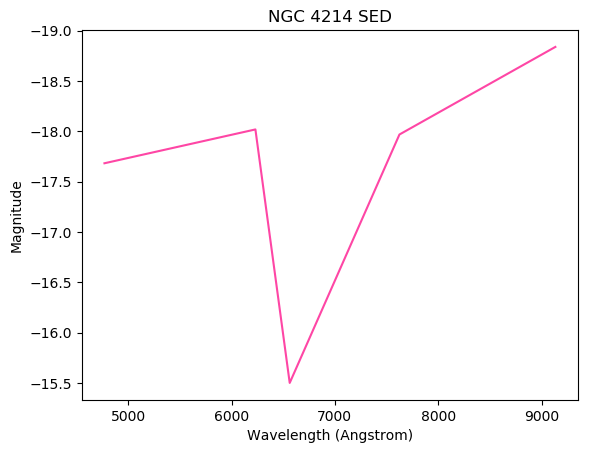

In [91]:
plt.plot(wavelengths, sorted_M,  color='xkcd:Barbie Pink', alpha=1.0) # You can brush my hair, undress me everywhere
plt.gca().invert_yaxis()
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Magnitude')
plt.title('NGC 4214 SED');

In [92]:
# What this analysis has shown is that a SED is not worth bothering with.

# Last and possibly least - saving reduced data to fits files:

In [93]:
# Ha
hdu = fits.PrimaryHDU(skyless_ha, header=header_array[0])
hdu.writeto('./fits/NGCreducedhalpha.fits')

# g
hdu = fits.PrimaryHDU(skyless_g, header=header_array[2])
hdu.writeto('./fits/NGCreducedg.fits')

# r
hdu = fits.PrimaryHDU(skyless_r, header=header_array[4])
hdu.writeto('./fits/NGCreducedr.fits')

# i
hdu = fits.PrimaryHDU(skyless_i, header=header_array[3])
hdu.writeto('./fits/NGCreducedi.fits')

# z
hdu = fits.PrimaryHDU(skyless_z, header=header_array[-1])
hdu.writeto('./fits/NGCreducedz.fits')